### Neural Networks

 - Basically a set of inter-connected nodes or neurons or perceptrons.
     - Typically consists of layers of such neurons.
     - Each neuron in a given layer is connected to all the neurons of the previous layers through a weight and an activatio function.
     - Activation function is used to generate the non-linearity in the model that is to be trained with the data in hand.
 Let us first consider how a single layer neural network would look like. For our purposes let's consider our input to be a three dimensional vector. For example let's say we are monitoring the Pressure, temperature and humidity at a weather station. the vector is $\vec{V}=\left(P, T, H\right)$. We would also need the label or the output. In this case this can be the chances of rain, $R$.

<img src="images/linearneuralnetwork.PNG" width="500" height="250">


$R'$ is the output of the untrained linear neural net and is given by:

\begin{equation}
R'=1\times w_0+P\times w_1+T\times w_2+H\times w_3
\end{equation}

The difference between the output of the untrained model, $R'$ and the actual value $R$, a function of the difference $\Delta=f\left(R-R'\right)$, known as the loss or the cost function is used to optimize the weights $w_i$ using optimization methods such as Gradient Descent. Note that we have a node to denote the offset whose input is always $1$ (weight given by $w_0$). As a rule of thumb, in the final representation and as well counting the number of neurons in each layer the node denoting the offset is mostly omitted. In the above example the neural network has single layer with three neurons. 

### Training a linear model using a  neural network

- We will try to first model a simple linear equation using a single layer neural network.
    - $y=3x+5$
    - The neural net model would look like $y'= w_0+w_1x$
    
We will first simulate some of the data:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
x = np.arange(0, 5, 0.5)

In [11]:
y = 3*x+5 #+ .001*np.random.randn(len(x))

Text(0,0.5,'y')

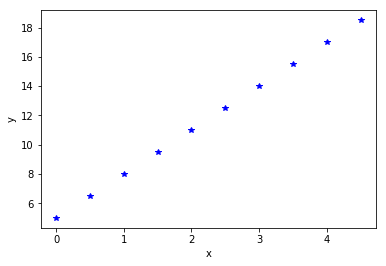

In [12]:
plt.plot(x, y, 'b*')
plt.xlabel('x')
plt.ylabel('y')

In [13]:
x = np.float32(x.reshape(-1, 1))
y = np.float32(y.reshape(-1, 1))

In [14]:
#Importing torch
import torch
import torch.nn as nn
from torch.autograd import Variable

In [15]:
#Create a class for the training
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_dim = input_size
        self.output_dim = output_size
        self.linear = nn.Linear(self.input_dim, self.output_dim)
    def forward(self, x):
        output = self.linear(x)
        return output

In [16]:
#Instantiate the model
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

What else is required?

- A loss function, in order to compare the output of the neural network to the real life value (in our case simulated y)
- A simple loss function would be the mean squared error:
    - $MSE = \frac{1}{n}\Sigma_i\left(\hat{y}_i-y_i\right)^2$
        - $\hat{y}_i$: predicted value
        - $y_i$: true value

In [17]:
#Define the loss function
criterion = nn.MSELoss(reduction='mean')

However learning still needs to takes place. The learning takes place by feeding back the loss function to the parameters in such a way that the loss function is minimized. 

- $\theta := \theta - \eta.\nabla_{\theta}$, where 
    - $\theta$ represents the parameters, 
    - $\eta$ is the learning rate
    - $\nabla_{\theta}$ is the gradient of the loss function w.r.t. $\theta$
- What are the parameters in this case?
    - $\alpha$ and $\beta$ in $y=\alpha x + \beta$
    - After successful learning we should obtain: $\alpha=3$, $\beta=5$

In [18]:
#Define learning rate
lr = 0.1
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

Now it is time to train. A few points before training:

- Generally once has to go through the dataset several time in order to properly optimize the weights, we fix the number of 'epochs' initially
- Since the inputs will generally be numpy array we have to convert them into torch tensors first.
- While going through each epoch, we compute the outputs and obtain the loss.
- The loss is then used to compute the gradients which will be used to update the parameters

In [19]:
nb_epoch = 100

In [20]:
epoch=0
for epoch in range(nb_epoch):
    epoch+=1
    #Convert the numpy array to torch tensor
    inputs = Variable(torch.from_numpy(x))
    labels = Variable(torch.from_numpy(y))
    
    #Clear the gradients
    optimizer.zero_grad()
    
    #Compute the output using forward pass
    outputs = model.forward(inputs)
    
    #Compute the loss
    loss = criterion(outputs, labels)
    
    #get the Gradient
    loss.backward()
    
    #Update the parameters
    optimizer.step()
    
    print('Epoch {},  Loss: {}'.format(epoch, loss.data))

Epoch 1,  Loss: 114.1458511352539
Epoch 2,  Loss: 40.75569152832031
Epoch 3,  Loss: 16.35734748840332
Epoch 4,  Loss: 8.05331802368164
Epoch 5,  Loss: 5.056278705596924
Epoch 6,  Loss: 3.826961040496826
Epoch 7,  Loss: 3.2023239135742188
Epoch 8,  Loss: 2.798548936843872
Epoch 9,  Loss: 2.4875075817108154
Epoch 10,  Loss: 2.2251219749450684
Epoch 11,  Loss: 1.9950758218765259
Epoch 12,  Loss: 1.7903472185134888
Epoch 13,  Loss: 1.6071312427520752
Epoch 14,  Loss: 1.4428300857543945
Epoch 15,  Loss: 1.2953797578811646
Epoch 16,  Loss: 1.1630163192749023
Epoch 17,  Loss: 1.0441830158233643
Epoch 18,  Loss: 0.9374939799308777
Epoch 19,  Loss: 0.8417062759399414
Epoch 20,  Loss: 0.7557060718536377
Epoch 21,  Loss: 0.6784930229187012
Epoch 22,  Loss: 0.6091689467430115
Epoch 23,  Loss: 0.5469277501106262
Epoch 24,  Loss: 0.49104633927345276
Epoch 25,  Loss: 0.4408746063709259
Epoch 26,  Loss: 0.3958286941051483
Epoch 27,  Loss: 0.35538533329963684
Epoch 28,  Loss: 0.3190743625164032
Epoch 2

In [21]:
list(model.parameters())

[Parameter containing:
 tensor([[3.0067]], requires_grad=True), Parameter containing:
 tensor([4.9795], requires_grad=True)]

In [22]:
with torch.no_grad():
    predicted = model.forward(inputs).data.numpy()

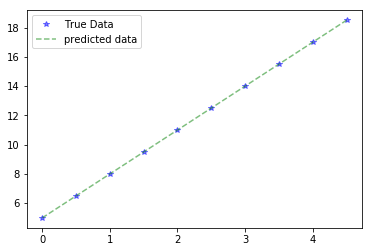

In [23]:
plt.plot(x, y, 'b*', label='True Data', alpha=0.5)
plt.plot(x, predicted, 'g--', label = 'predicted data', alpha=0.5)
plt.legend(loc='best')

### Loss 

Loss is way to estimate how much the predicted output is different from the actual value (in case of regression) and label (in case of classification). The loss is also often called cost function. 

In case of regression a common cost function would be the Mean Square Loss. Suppose we define our model as $h_{\theta}\left(x\right)$ then we define the loss function as :

\begin{equation}
J\left(\theta\right) = \sum_{i=1}^{n} \left(h_{\theta}\left(x^i\right)-y^i\right)^2
\end{equation}
where $x^i$ are the risen incidents.



### What about non-linearity?

The above example was about linear regression and hence a linear model could easily model the sample data. However we want to be able to data that is non-linear as well. Non-linearity is introduced in Neural networks through what are known as activation function. A well known activation function is the Sigmoid function which is given by :

\begin{equation}
S(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{e^z+1}
\end{equation}

If you plot the sigmoid function this is what it looks like:

In case of a classification problem, this loss function described above for the problem of regression will not give us much information. Consider the case when we consider the output of a binary classifier. The loss function used in this case is of the form:

\begin{equation}
J\left(\theta\right) = \sum_{i=1}^n\left[y^ilogh\left(x^i\right)+\left(1-y^i\right)log\left(i-h\left(x^i\right)\right)\right]
\end{equation}


In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

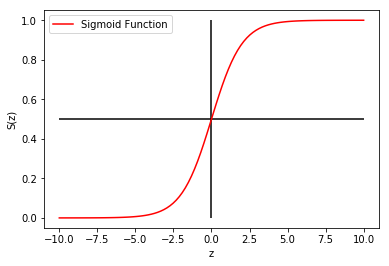

In [25]:
z = np.linspace(-10, 10, num=100 )
plt.plot(z, sigmoid(z), 'r-', label='Sigmoid Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('S(z)')
plt.hlines(y=0.5, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=1)

#### ReLU activation
There are a few other popular activation functions as well. A particularly popular one is the ReLU (Rectified Linear Unit ) activation which looks like:

\begin{equation}
R\left(x\right) = max(x, 0)
\end{equation}

In [26]:
def relu(x):
    return max(x,0.0)

In [27]:
relu_vec = np.vectorize(relu)

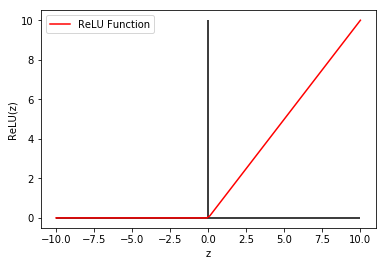

In [28]:
z = np.linspace(-10, 10, num=100)
plt.plot(z, relu_vec(z), 'r-', label='ReLU Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.hlines(y=0, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=10)

In order to enable non-linearity in our models we apply activation function to each node or neuron of a layer.

<img src="images/linearneuralnetworkplusactivation.PNG" width="500" height="250">

In the above diagram we see the activation function applied to the final layer which has a single neuron in it. In general, activation functions are applied to all the neurons in each layer, with each neuron being applied an activation function. 

In order to maximize the effectiveness of neural network we need to add more layers of network. This combined with the activation function will allow us to model complex data which has non-trivial relationship between the features and the labels:

<img src="images/multilayerneuralnet.png" width="500" height="250">

#### Softmax activation
The softmax activation function is another highly popular activation function which is usually used in the final layer when doing multiclass-classification using neural networks. Suppose we want to apply softmax to the output of a neural network classfier trying to classify 10 types of images with classes $k=1,2..10$. The output layer would thus have 10 layers. The softmax activated output for the i$^{th}$ neuron of the final layer would be thus given by 


\begin{equation}
P\left(y=2|x\right) = \frac{e^{x^Tw_j}}{\Sigma_k e^{x^Tw_k}}
\end{equation}

#### Backpropagation

As we can see that a neural network can very complicated and perform parameter updates (here the weight $w_{ij}$), we will need to compute the gradient at each node. This is known as backpropagation as the error obtained by comparing the output with the actual value using a loss function is then used to compute the gradients of the parameters. 

#### Basic classfication using Neural Networks

Let us try some basic classification using neural networks. For this purposes I will use a very popular dataset, the breast cancer diagnostics dataset origically sourced from the University of Wisconsin.

In [29]:
from sklearn.datasets import load_breast_cancer

In [30]:
data = load_breast_cancer()

In [35]:
df = pd.DataFrame(data=data.data, columns=list(data.feature_names))

In [36]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Before we start modeling, we need to split the data into training and test sets in order to have an independent verification of our model. This functionality available in the sklearn package.

In [253]:
X = np.float32(data.data)
y = np.float32(data.target).reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
y.shape

(569, 1)

In [255]:
import torch.nn.functional as F

In [260]:
#Create a class for the training
class Classification(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(30, 60)
        self.dropout1 = nn.Dropout(p=0.1)
        self.linear2 = nn.Linear(60, 120)
        self.dropout2 = nn.Dropout(p=0.1)
        self.linear3 = nn.Linear(120, 60)
        self.dropout3 = nn.Dropout(p=0.1)
        self.linear4 = nn.Linear(60, 10)
        self.dropout4 = nn.Dropout(p=0.1)
        self.linear5 = nn.Linear(10, 1)
    def forward(self, x):
        output = F.relu(self.linear1(x))
        output = self.dropout1(output)
        output = F.relu(self.linear2(output))
        output = self.dropout2(output)
        output = F.relu(self.linear3(output))
        output = self.dropout3(output)
        output = F.relu(self.linear4(output))
        output = self.dropout4(output)
        output = torch.sigmoid(self.linear5(output))
        return output

In [261]:
#Initializing the model
model = Classification()
#Setting the loss 
criterion = nn.BCELoss()
#Define learning rate
lr = 0.001
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [262]:
from sklearn.metrics import roc_auc_score, accuracy_score
nb_epoch = 1000
for epoch in range(nb_epoch):
    epoch+=1
    #Convert the numpy array to torch tensor
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #Clear the gradients
    optimizer.zero_grad()
    
    #Compute the output using forward pass
    outputs = model.forward(inputs)
#     print(outputs)
    
    #Compute the loss
    loss = criterion(outputs, labels)
    
    #get the Gradient
    loss.backward()
    
    #Update the parameters
    optimizer.step()
    
    with torch.no_grad():
        prob = model.forward(inputs)
        y_pred = prob.numpy()
        y_pred = (y_pred>0.6)
        score = roc_auc_score(labels, prob)
        accuracy = accuracy_score(y_train, y_pred)
    
    print('Epoch {},  ROC_AUC: {}, Accuracy: {}'.format(epoch, score, accuracy))

Epoch 1,  ROC_AUC: 0.5822609343319403, Accuracy: 0.3758241758241758
Epoch 2,  ROC_AUC: 0.5865022551413084, Accuracy: 0.36923076923076925
Epoch 3,  ROC_AUC: 0.6133570571440394, Accuracy: 0.3868131868131868
Epoch 4,  ROC_AUC: 0.49135184342284927, Accuracy: 0.3978021978021978
Epoch 5,  ROC_AUC: 0.4952828236851906, Accuracy: 0.41318681318681316
Epoch 6,  ROC_AUC: 0.47928994082840237, Accuracy: 0.3758241758241758
Epoch 7,  ROC_AUC: 0.5894194562833616, Accuracy: 0.3934065934065934
Epoch 8,  ROC_AUC: 0.5838643604915794, Accuracy: 0.34505494505494505
Epoch 9,  ROC_AUC: 0.6131398187611206, Accuracy: 0.35604395604395606
Epoch 10,  ROC_AUC: 0.634067116315637, Accuracy: 0.37362637362637363
Epoch 11,  ROC_AUC: 0.6058881946455911, Accuracy: 0.3802197802197802
Epoch 12,  ROC_AUC: 0.5790954607522655, Accuracy: 0.35384615384615387
Epoch 13,  ROC_AUC: 0.5682645756610254, Accuracy: 0.36923076923076925
Epoch 14,  ROC_AUC: 0.5553026854802001, Accuracy: 0.3648351648351648
Epoch 15,  ROC_AUC: 0.5102826167914

Epoch 133,  ROC_AUC: 0.9256630943021475, Accuracy: 0.8923076923076924
Epoch 134,  ROC_AUC: 0.9249596557288866, Accuracy: 0.8923076923076924
Epoch 135,  ROC_AUC: 0.9353870981089916, Accuracy: 0.8923076923076924
Epoch 136,  ROC_AUC: 0.9418939049116564, Accuracy: 0.8637362637362638
Epoch 137,  ROC_AUC: 0.9376112053626847, Accuracy: 0.8615384615384616
Epoch 138,  ROC_AUC: 0.9211941904249596, Accuracy: 0.8857142857142857
Epoch 139,  ROC_AUC: 0.9349526213431539, Accuracy: 0.8923076923076924
Epoch 140,  ROC_AUC: 0.931394049737245, Accuracy: 0.8879120879120879
Epoch 141,  ROC_AUC: 0.9370422476931353, Accuracy: 0.8703296703296703
Epoch 142,  ROC_AUC: 0.9355939918070095, Accuracy: 0.8791208791208791
Epoch 143,  ROC_AUC: 0.9333491951835148, Accuracy: 0.8681318681318682
Epoch 144,  ROC_AUC: 0.926325154135805, Accuracy: 0.8725274725274725
Epoch 145,  ROC_AUC: 0.9304837174659659, Accuracy: 0.8747252747252747
Epoch 146,  ROC_AUC: 0.9257044730417512, Accuracy: 0.8703296703296703
Epoch 147,  ROC_AUC: 0

Epoch 255,  ROC_AUC: 0.9661315016344602, Accuracy: 0.8967032967032967
Epoch 256,  ROC_AUC: 0.9653246162121901, Accuracy: 0.9098901098901099
Epoch 257,  ROC_AUC: 0.9619522489344975, Accuracy: 0.8945054945054945
Epoch 258,  ROC_AUC: 0.9626143087681549, Accuracy: 0.8879120879120879
Epoch 259,  ROC_AUC: 0.9639384284354698, Accuracy: 0.9076923076923077
Epoch 260,  ROC_AUC: 0.964331526461704, Accuracy: 0.8967032967032967
Epoch 261,  ROC_AUC: 0.9588178094095253, Accuracy: 0.9186813186813186
Epoch 262,  ROC_AUC: 0.9541937352588239, Accuracy: 0.8967032967032967
Epoch 263,  ROC_AUC: 0.9614143253196508, Accuracy: 0.8945054945054945
Epoch 264,  ROC_AUC: 0.9655935780196134, Accuracy: 0.9010989010989011
Epoch 265,  ROC_AUC: 0.9645797988993254, Accuracy: 0.8857142857142857
Epoch 266,  ROC_AUC: 0.9641867008730914, Accuracy: 0.8989010989010989
Epoch 267,  ROC_AUC: 0.9651177225141723, Accuracy: 0.8901098901098901
Epoch 268,  ROC_AUC: 0.9585591922870029, Accuracy: 0.9120879120879121
Epoch 269,  ROC_AUC: 

Epoch 389,  ROC_AUC: 0.9789382215417719, Accuracy: 0.9252747252747253
Epoch 390,  ROC_AUC: 0.9794761451566185, Accuracy: 0.9142857142857143
Epoch 391,  ROC_AUC: 0.9755244755244755, Accuracy: 0.9318681318681319
Epoch 392,  ROC_AUC: 0.9767244589729795, Accuracy: 0.9318681318681319
Epoch 393,  ROC_AUC: 0.9802209624694832, Accuracy: 0.9362637362637363
Epoch 394,  ROC_AUC: 0.975483096784872, Accuracy: 0.9340659340659341
Epoch 395,  ROC_AUC: 0.9783796085571234, Accuracy: 0.9340659340659341
Epoch 396,  ROC_AUC: 0.979020979020979, Accuracy: 0.9076923076923077
Epoch 397,  ROC_AUC: 0.9789382215417719, Accuracy: 0.9252747252747253
Epoch 398,  ROC_AUC: 0.9758968841809079, Accuracy: 0.9186813186813186
Epoch 399,  ROC_AUC: 0.9761244672487276, Accuracy: 0.9274725274725275
Epoch 400,  ROC_AUC: 0.9772003144784209, Accuracy: 0.9340659340659341
Epoch 401,  ROC_AUC: 0.980034758141267, Accuracy: 0.9340659340659341
Epoch 402,  ROC_AUC: 0.9792899408284024, Accuracy: 0.9208791208791208
Epoch 403,  ROC_AUC: 0.

Epoch 526,  ROC_AUC: 0.9903587536723631, Accuracy: 0.945054945054945
Epoch 527,  ROC_AUC: 0.9891794595936608, Accuracy: 0.9406593406593406
Epoch 528,  ROC_AUC: 0.98398642777341, Accuracy: 0.9406593406593406
Epoch 529,  ROC_AUC: 0.9859932966441842, Accuracy: 0.9538461538461539
Epoch 530,  ROC_AUC: 0.9877312037075351, Accuracy: 0.9318681318681319
Epoch 531,  ROC_AUC: 0.987027765134274, Accuracy: 0.9274725274725275
Epoch 532,  ROC_AUC: 0.9859726072743824, Accuracy: 0.9318681318681319
Epoch 533,  ROC_AUC: 0.9857243348367609, Accuracy: 0.9384615384615385
Epoch 534,  ROC_AUC: 0.9863036371912112, Accuracy: 0.9362637362637363
Epoch 535,  ROC_AUC: 0.9878553399263458, Accuracy: 0.9362637362637363
Epoch 536,  ROC_AUC: 0.9845450407580585, Accuracy: 0.9318681318681319
Epoch 537,  ROC_AUC: 0.9848553813050853, Accuracy: 0.9252747252747253
Epoch 538,  ROC_AUC: 0.9849588281540944, Accuracy: 0.9318681318681319
Epoch 539,  ROC_AUC: 0.9899863450159309, Accuracy: 0.945054945054945
Epoch 540,  ROC_AUC: 0.98

Epoch 647,  ROC_AUC: 0.9896966938387056, Accuracy: 0.945054945054945
Epoch 648,  ROC_AUC: 0.9876898249679316, Accuracy: 0.9538461538461539
Epoch 649,  ROC_AUC: 0.9918070095584888, Accuracy: 0.9296703296703297
Epoch 650,  ROC_AUC: 0.9929449248975877, Accuracy: 0.945054945054945
Epoch 651,  ROC_AUC: 0.9898208300575164, Accuracy: 0.9494505494505494
Epoch 652,  ROC_AUC: 0.9904828898911738, Accuracy: 0.9516483516483516
Epoch 653,  ROC_AUC: 0.9873794844209045, Accuracy: 0.945054945054945
Epoch 654,  ROC_AUC: 0.9926138949807588, Accuracy: 0.9384615384615385
Epoch 655,  ROC_AUC: 0.9932552654446146, Accuracy: 0.9494505494505494
Epoch 656,  ROC_AUC: 0.9918276989282906, Accuracy: 0.9560439560439561
Epoch 657,  ROC_AUC: 0.9936897422104523, Accuracy: 0.9648351648351648
Epoch 658,  ROC_AUC: 0.992200107584723, Accuracy: 0.9538461538461539
Epoch 659,  ROC_AUC: 0.9921794182149212, Accuracy: 0.9362637362637363
Epoch 660,  ROC_AUC: 0.9918070095584888, Accuracy: 0.9384615384615385
Epoch 661,  ROC_AUC: 0.9

Epoch 774,  ROC_AUC: 0.9940414614970828, Accuracy: 0.9472527472527472
Epoch 775,  ROC_AUC: 0.9957793685604336, Accuracy: 0.9648351648351648
Epoch 776,  ROC_AUC: 0.9948069681797492, Accuracy: 0.9494505494505494
Epoch 777,  ROC_AUC: 0.9957173004510282, Accuracy: 0.9626373626373627
Epoch 778,  ROC_AUC: 0.9944966276327223, Accuracy: 0.9582417582417583
Epoch 779,  ROC_AUC: 0.9946000744817313, Accuracy: 0.9472527472527472
Epoch 780,  ROC_AUC: 0.9972069350767576, Accuracy: 0.9604395604395605
Epoch 781,  ROC_AUC: 0.9968965945297307, Accuracy: 0.9714285714285714
Epoch 782,  ROC_AUC: 0.996855215790127, Accuracy: 0.9626373626373627
Epoch 783,  ROC_AUC: 0.995137998096578, Accuracy: 0.9582417582417583
Epoch 784,  ROC_AUC: 0.9942069764554972, Accuracy: 0.9648351648351648
Epoch 785,  ROC_AUC: 0.9976827905821989, Accuracy: 0.967032967032967
Epoch 786,  ROC_AUC: 0.9929449248975877, Accuracy: 0.9538461538461539
Epoch 787,  ROC_AUC: 0.996751768941118, Accuracy: 0.967032967032967
Epoch 788,  ROC_AUC: 0.99

Epoch 891,  ROC_AUC: 0.9983448504158563, Accuracy: 0.9714285714285714
Epoch 892,  ROC_AUC: 0.9980345098688295, Accuracy: 0.9758241758241758
Epoch 893,  ROC_AUC: 0.9985310547440726, Accuracy: 0.9824175824175824
Epoch 894,  ROC_AUC: 0.9965862539827037, Accuracy: 0.9604395604395605
Epoch 895,  ROC_AUC: 0.9952621343153888, Accuracy: 0.9714285714285714
Epoch 896,  ROC_AUC: 0.9979310630198205, Accuracy: 0.9736263736263736
Epoch 897,  ROC_AUC: 0.9981379567178384, Accuracy: 0.9692307692307692
Epoch 898,  ROC_AUC: 0.9988000165514959, Accuracy: 0.9692307692307692
Epoch 899,  ROC_AUC: 0.9975793437331899, Accuracy: 0.967032967032967
Epoch 900,  ROC_AUC: 0.996751768941118, Accuracy: 0.9648351648351648
Epoch 901,  ROC_AUC: 0.9977034799520006, Accuracy: 0.967032967032967
Epoch 902,  ROC_AUC: 0.9977034799520007, Accuracy: 0.978021978021978
Epoch 903,  ROC_AUC: 0.9978483055406132, Accuracy: 0.9648351648351648
Epoch 904,  ROC_AUC: 0.9972276244465592, Accuracy: 0.9714285714285714
Epoch 905,  ROC_AUC: 0.9

In [263]:
from sklearn.metrics import roc_curve

Let us look at the roc curve of the model especially over the test data

In [264]:
#computing the ROC curve and accuracy
with torch.no_grad():
    probs = model.forward(torch.from_numpy(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, probs.numpy())
    roc_score = roc_auc_score(y_test, probs.numpy())
    

Text(0,0.5,'TPR')

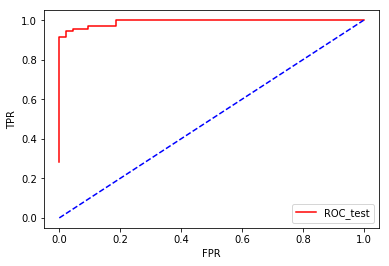

In [265]:
plt.plot(fpr, tpr, 'r-', label='ROC_test')
plt.plot([0,1], [0, 1], 'b--')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [266]:
print('The ROC_AUC score is : {}'.format(roc_score))

The ROC_AUC score is : 0.9921388797903701


In [267]:
#computing the ROC curve
with torch.no_grad():
    probs = model.forward(torch.from_numpy(X_train))
    fpr, tpr, thresholds = roc_curve(y_train, probs.numpy())
    roc_score = roc_auc_score(y_train, probs.numpy())

Text(0,0.5,'TPR')

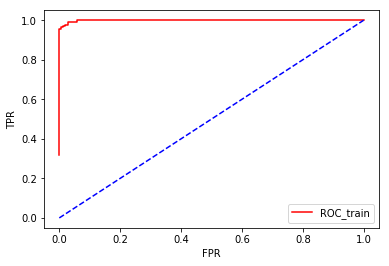

In [268]:
plt.plot(fpr, tpr, 'r-', label='ROC_train')
plt.plot([0,1], [0, 1], 'b--')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [220]:
print('The ROC_AUC score is : {}'.format(roc_score))

The ROC_AUC score is : 0.9695245582819547


In [243]:
thresholds

array([9.9999642e-01, 9.8255932e-01, 9.8252547e-01, 9.7296202e-01,
       9.7182673e-01, 8.6164910e-01, 8.5993594e-01, 7.8749830e-01,
       7.7577221e-01, 7.3722941e-01, 7.3564368e-01, 7.2272819e-01,
       7.1450621e-01, 6.7019290e-01, 6.6057664e-01, 6.5305227e-01,
       6.5253633e-01, 6.2765229e-01, 6.1434555e-01, 5.9129089e-01,
       5.0539440e-01, 4.3838218e-01, 4.2508954e-01, 4.1770485e-01,
       3.7122795e-01, 3.6926630e-01, 3.4274828e-01, 3.3668280e-01,
       2.7313140e-01, 2.2766297e-01, 6.2885605e-02, 5.1282577e-02,
       1.7906519e-24], dtype=float32)

### Regularization using Dropouts

In a neural network, no particular neuron or perceptron should get a special preference. In order to make it possible, a regularization mechanism is introduced known as the dropout regularization. In dropout regularization, we deactivate a number of randomly selected neurons in each layer in each epoch. Thus it makes sure that no one neuron is particularly more overused. This decreases the chances of overfitting.  

#### Convolutional Neural Networks

Convolutional Neural Network (CNN) is a variety of neural network that is used to classify images. This type of network utilizes convolutional layers to extract features from the images. 

Let us get the data which we will use to train a CNN for classification purposes. One of the most standard datasets used for image classfication is the MNIST dataset which is collection of labeled handwritten digits. The dataset can be downloaded using torchvision datasets. 

In [287]:
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

batch_size = 64
nb_epoch = 5
num_classes = 10
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

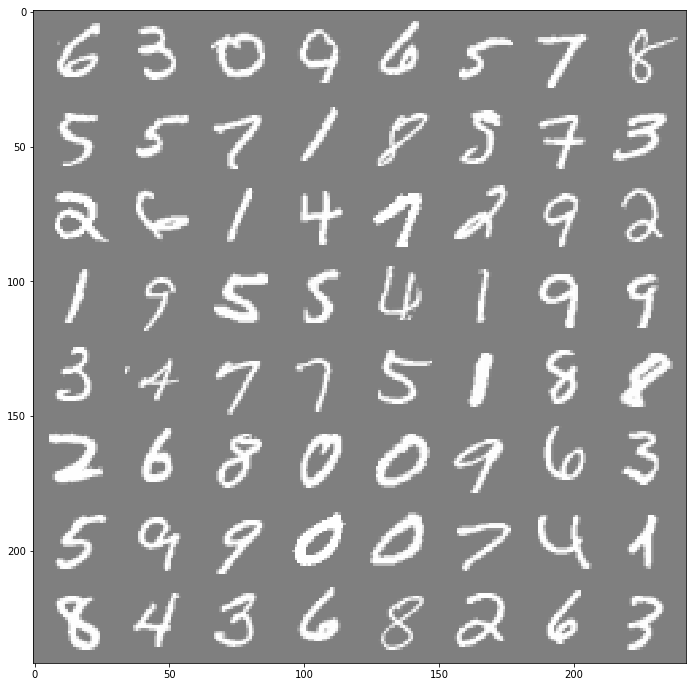

The labels are : [6 3 0 9 6 5 7 8 5 5 7 1 8 5 7 3 2 6 1 4 7 2 9 2 1 9 5 5 4 1 9 9 3 4 7 7 5
 1 8 8 2 6 8 0 0 9 6 3 5 9 9 0 0 7 4 1 8 4 3 6 8 2 6 3]


In [288]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
print('The labels are : {}'.format(labels.numpy()))

In [289]:
images.size()

torch.Size([64, 1, 28, 28])

In [336]:
class CNN(nn.Module):
    """
    Convolutional neural network with the LeNet 5.
    LeNet-5 consist of the following layers:
    Input size images: 28x28
    Convolution layer 1:
    Padding: Same, (input_size = output_size)
    Kernel Size = 5
    output_channels = 16
    MaxPool size = 2
    
    Conv layer 2:
    Input channels = 16
    Output channels = 32
    Kernel Size = 5
    padding = same
    MaxPool size = 2
    
    this is followed by a fully connecte layer and the last layer with 10 neurons (num_classes)
    """
    def __init__(self):
        super(CNN, self).__init__()
        #Convolutional Layer 1
        self.conv1 = nn.Sequential(
                    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
                    nn.ReLU(),
                    nn.Dropout2d(p=0.2),
                    nn.MaxPool2d(kernel_size=2))
        #Convolutional layer 2
        self.conv2 = nn.Sequential(
                    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
                    nn.ReLU(),
                    nn.Dropout2d(p=0.2),
                    nn.MaxPool2d(kernel_size=2))
        #Fully connected layer 
        self.fc = nn.Linear(32*7*7, 10)
    def forward(self, x):
        out1 = self.conv1(x)
        out2 = self.conv2(out1)
        #now flatten the output of the second convolution layer so that we can feed into the fully connected layer
        out3 = out2.view(out2.size(0), -1)
        out = self.fc(out3)
        return out1, out2, out

In [337]:
lr = .001
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [338]:
#Training
total_step = len(train_loader)
for epoch in range(nb_epoch):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        _,_,outputs = model.forward(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            correct = 0
            total = 0
            for images1, labels1 in test_loader:
                #Load images, labels
                images1 = images1.to(device)
                labels1 = labels1.to(device)
                
                with torch.no_grad():
                    _, _, output  = model.forward(images1)
                    #get predictions from maxvalues
                    prediction = torch.max(output, 1)[1]
                    total+=labels1.size(0)
                    correct+=(prediction==labels1).sum()
                    accuracy = 100.0*correct/total
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Test Accuracy: {:.4f}' 
                   .format(epoch+1, nb_epoch, i+1, total_step, loss.item(), accuracy))

Epoch [1/5], Step [100/938], Loss: 0.3041, Test Accuracy: 90.0000
Epoch [1/5], Step [200/938], Loss: 0.3500, Test Accuracy: 94.0000
Epoch [1/5], Step [300/938], Loss: 0.2597, Test Accuracy: 95.0000
Epoch [1/5], Step [400/938], Loss: 0.1345, Test Accuracy: 96.0000
Epoch [1/5], Step [500/938], Loss: 0.1372, Test Accuracy: 96.0000
Epoch [1/5], Step [600/938], Loss: 0.0696, Test Accuracy: 97.0000
Epoch [1/5], Step [700/938], Loss: 0.1242, Test Accuracy: 97.0000
Epoch [1/5], Step [800/938], Loss: 0.1007, Test Accuracy: 97.0000
Epoch [1/5], Step [900/938], Loss: 0.0272, Test Accuracy: 97.0000
Epoch [2/5], Step [100/938], Loss: 0.0376, Test Accuracy: 97.0000
Epoch [2/5], Step [200/938], Loss: 0.2433, Test Accuracy: 97.0000
Epoch [2/5], Step [300/938], Loss: 0.0584, Test Accuracy: 97.0000
Epoch [2/5], Step [400/938], Loss: 0.0265, Test Accuracy: 97.0000
Epoch [2/5], Step [500/938], Loss: 0.0940, Test Accuracy: 97.0000
Epoch [2/5], Step [600/938], Loss: 0.0116, Test Accuracy: 98.0000
Epoch [2/5